In [1]:
csvfiles = {
    "alpha": ["/home/tjw/Downloads/apalis/GPS-alpha01.csv", "/home/tjw/Downloads/apalis/GPS-alpha02.csv"],
    "beta": ["/home/tjw/Downloads/apalis/GPS-beta01.csv"],
    "gamma": ["/home/tjw/Downloads/apalis/GPS-gamma01.csv"],
    "delta": ["/home/tjw/Downloads/apalis/GPS-delta01.csv"],
    "epsilon": [],
    "zeta": ["/home/tjw/Downloads/apalis/GPS-zeta01.csv", "/home/tjw/Downloads/apalis/GPS-zeta02.csv", "/home/tjw/Downloads/apalis/GPS-zeta03.csv"],
    "eta": ["/home/tjw/Downloads/apalis/GPS-eta02.csv"]
}

In [2]:
data = {}
SKIP = 10

for tractor in csvfiles:
    data[tractor] = []
    for csv in csvfiles[tractor]:
        with open(csv) as file:
            i = 0
            for line in file.readlines()[1:]:
                i += 1
                if i % SKIP == 0:
                    _, lat, lng = line.split(",")
                    data[tractor].append((float(lng.rstrip()), float(lat)))


In [3]:
import geojson
from shapely.geometry import Polygon

with open("County_Boundaries_of_Indiana_2023.geojson") as file:
    IN_COUNTIES = geojson.load(file)

counties = {}
for i in range(len(IN_COUNTIES["features"])):
    name = IN_COUNTIES["features"][i]["properties"]["name"]
    name = name.split(" County")[0]
    counties[name] = Polygon(IN_COUNTIES["features"][i]["geometry"]["coordinates"][0][0])


In [4]:
# Copied from https://stackoverflow.com/a/70533052
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def plot_polygon(ax, poly, **kwargs):
    path = Path.make_compound_path(
        Path(np.asarray(poly.exterior.coords)[:, :2]),
        *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])

    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)
    
    ax.add_collection(collection, autolim=True)
    ax.autoscale_view()
    return collection

In [5]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Greedy (but still slow) County Checker
def check_county(coords, county):
    for point in coords:
        if county.contains(Point(point)):
            return True
    return False

# Get list of counties for each tractor
data_counties = {}
for tractor in data:
    data_counties[tractor] = []
    for county in counties:
        if check_county(data[tractor], counties[county]):
            data_counties[tractor].append(county)
    print(f"{tractor}: {data_counties[tractor]}")


alpha: ['Allen', 'Blackford', 'Fulton', 'Jasper', 'Lake', 'Laporte', 'Newton', 'Porter', 'Randolph', 'St Joseph', 'Cass', 'Grant', 'Huntington', 'Jay', 'Miami', 'Marshall', 'Wabash', 'White', 'Whitley', 'Wells']
beta: ['Adams', 'Delaware', 'Dubois', 'Fulton', 'Jasper', 'Madison', 'Porter', 'Randolph', 'Starke', 'Washington', 'Crawford', 'Grant', 'Huntington', 'Jay', 'Lawrence', 'Miami', 'Martin', 'Orange', 'Steuben', 'Wabash']
gamma: ['Blackford', 'Jasper', 'Grant', 'Huntington', 'Wabash']
delta: ['Madison', 'Grant', 'Huntington']
epsilon: []
zeta: ['Allen', 'Boone', 'Daviess', 'Delaware', 'Dubois', 'Fulton', 'Greene', 'Hamilton', 'Jasper', 'Kosciusko', 'Lake', 'Madison', 'Marion', 'Newton', 'Noble', 'Porter', 'Pulaski', 'Starke', 'Tipton', 'Grant', 'Howard', 'Huntington', 'Johnson', 'Miami', 'Monroe', 'Morgan', 'Martin', 'Marshall', 'Whitley']
eta: ['Dubois', 'Crawford', 'Lawrence', 'Martin', 'Orange']


In [6]:
countylist = []
for tractor in data_counties:
    for county in data_counties[tractor]:
        if county not in countylist:
            countylist.append(county)

countylist.sort()
print(countylist)


['Adams', 'Allen', 'Blackford', 'Boone', 'Cass', 'Crawford', 'Daviess', 'Delaware', 'Dubois', 'Fulton', 'Grant', 'Greene', 'Hamilton', 'Howard', 'Huntington', 'Jasper', 'Jay', 'Johnson', 'Kosciusko', 'Lake', 'Laporte', 'Lawrence', 'Madison', 'Marion', 'Marshall', 'Martin', 'Miami', 'Monroe', 'Morgan', 'Newton', 'Noble', 'Orange', 'Porter', 'Pulaski', 'Randolph', 'St Joseph', 'Starke', 'Steuben', 'Tipton', 'Wabash', 'Washington', 'Wells', 'White', 'Whitley']


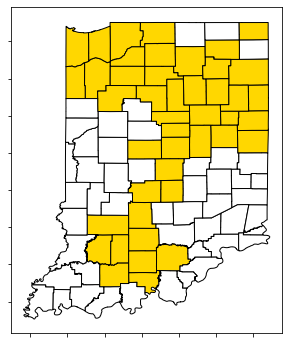

In [7]:
fig, ax = plt.subplots()
for county in counties:
    if county in countylist:
        plot_polygon(ax, counties[county], facecolor="gold", edgecolor="black")
    else:
        plot_polygon(ax, counties[county], facecolor="white", edgecolor="black")

ax.set_xticklabels("")
ax.set_yticklabels("")
fig.set_size_inches(6,6)
ax.set_aspect(1.0)
